## 6.5 Unsupervised Machine Learning: Clustering

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering
#### 4. Combining k-means clustering

### 1. Importing libraries and data and renaming columns

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set()
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Importing data
path = r"C:\Users\Mafalda\Documents\mafalda\Formação\Data Analytics\CareerFoundry\Data Analytics Program\2.Data Immersion\Achievement 6\Boat Sales Analysis"

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_data_categories_v1.csv'), index_col = False)

In [5]:
df.shape

(9893, 14)

In [6]:
df.columns

Index(['Unnamed: 0', 'Price', 'Boat Type', 'Manufacturer', 'Condition',
       'Boat Age', 'Year Built', 'Length', 'Width', 'Boat Area (m2)', 'Visits',
       'Material', 'Country', 'Visits_categorical'],
      dtype='object')

In [7]:
df.head()

,Unnamed: 0,Price,Boat Type,Manufacturer,Condition,Boat Age,Year Built,Length,Width,Boat Area (m2),Visits,Material,Country,Visits_categorical
0,0,3537,Motor Yacht,Rigiflex power boats,Used,6.000000,2017,4.00,1.90,7.60,226,Other,Switzerland,Medium
1,1,3490,Center console boat,Terhi power boats,Used,3.000000,2020,4.00,1.50,6.00,75,Thermoplastic,Germany,Low
2,2,3996,Sport Boat,Marine power boats,Used,129.807237,0,3.69,1.42,5.24,124,Aluminium,Switzerland,Low
3,3,3367,Sport Boat,Pioner power boats,Used,3.000000,2020,3.00,1.00,3.00,64,Other,Denmark,Low
4,4,3399,Fishing Boat,Linder power boats,Used,4.000000,2019,3.55,1.46,5.18,58,Aluminium,Germany,Low


In [8]:
# Dropping categorical columns
df1=df.drop(['Unnamed: 0','Boat Type', 'Manufacturer','Condition','Year Built','Material','Country', 'Visits_categorical' ],axis = 1)

In [9]:
df1.shape

(9893, 6)

In [10]:
df1.head()

,Price,Boat Age,Length,Width,Boat Area (m2),Visits
0,3537,6.000000,4.00,1.90,7.60,226
1,3490,3.000000,4.00,1.50,6.00,75
2,3996,129.807237,3.69,1.42,5.24,124
3,3367,3.000000,3.00,1.00,3.00,64
4,3399,4.000000,3.55,1.46,5.18,58


### 2. The elbow technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Mafalda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mafalda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mafalda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mafalda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

[-9327623810572804.0,
 -3692792786186909.5,
 -2082015940088205.8,
 -1195363783066309.0,
 -807468066578430.0,
 -579085012861801.0,
 -409221854774878.0,
 -304783528883016.94,
 -242260559669795.2]

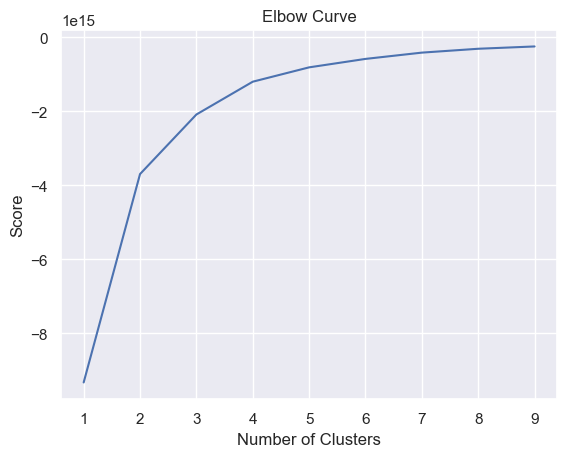

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####   There's a large jump two to sux on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is six.

### 3. k-means clustering

In [14]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4) 

In [15]:
# Fit the k-means object to the data.
kmeans.fit(df1)

C:\Users\Mafalda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [16]:
df1['clusters'] = kmeans.fit_predict(df1)

C:\Users\Mafalda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
df1['clusters'].value_counts()

clusters
0    9352
3     460
1      71
2      10
Name: count, dtype: int64

C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


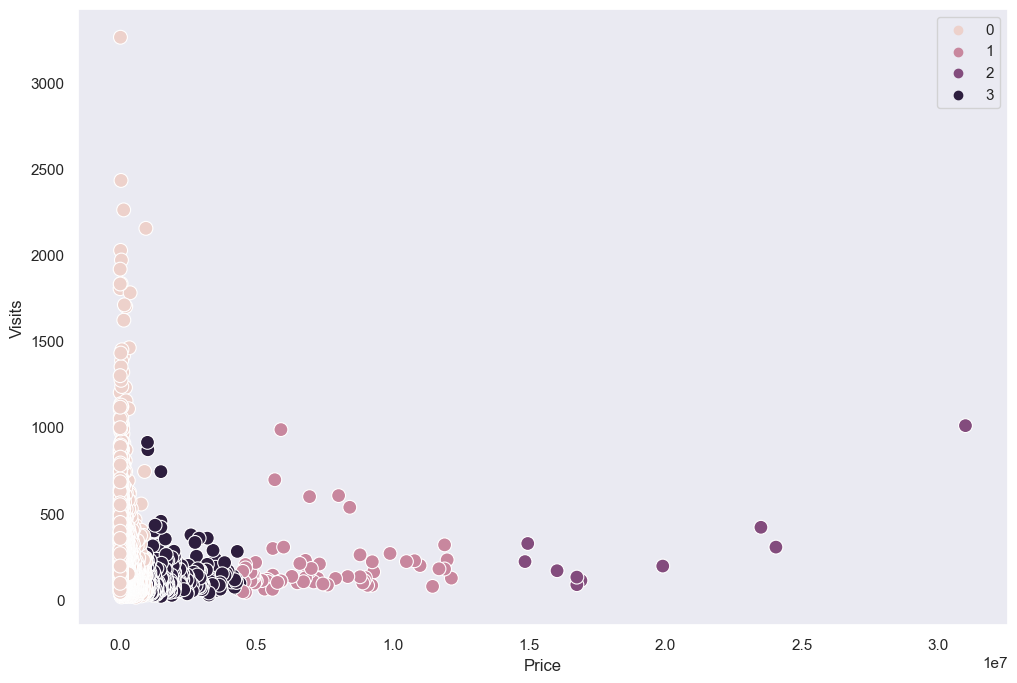

In [18]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Price'], y=df1['Visits'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price') # Label x-axis.
plt.ylabel('Visits') # Label y-axis.
plt.show()

C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


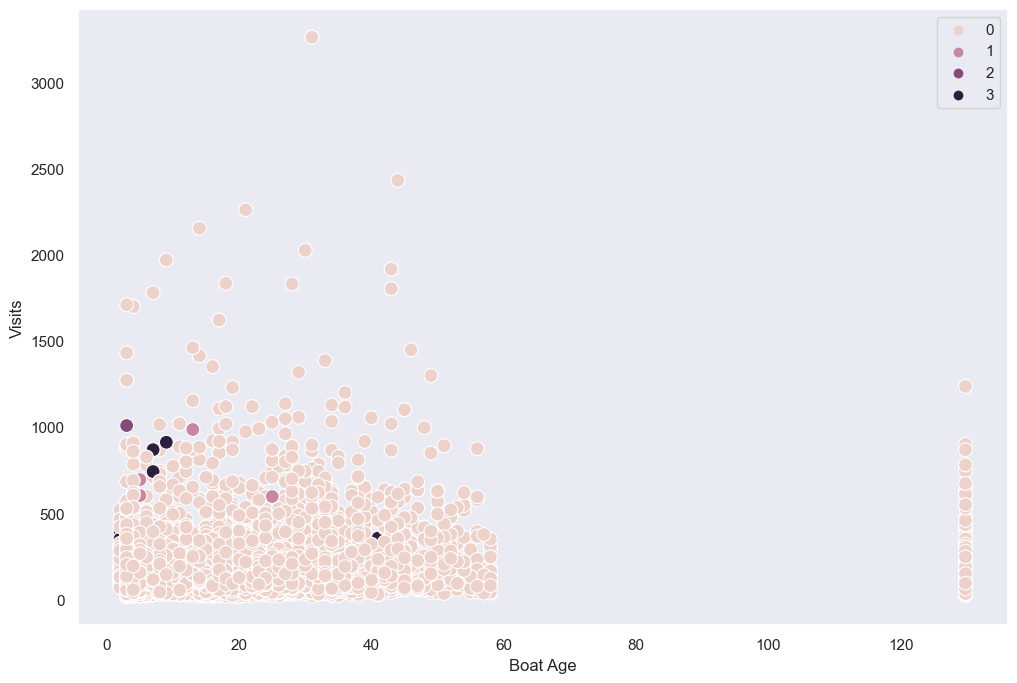

In [19]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Boat Age'], y=df1['Visits'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Boat Age') # Label x-axis.
plt.ylabel('Visits') # Label y-axis.
plt.show()

C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


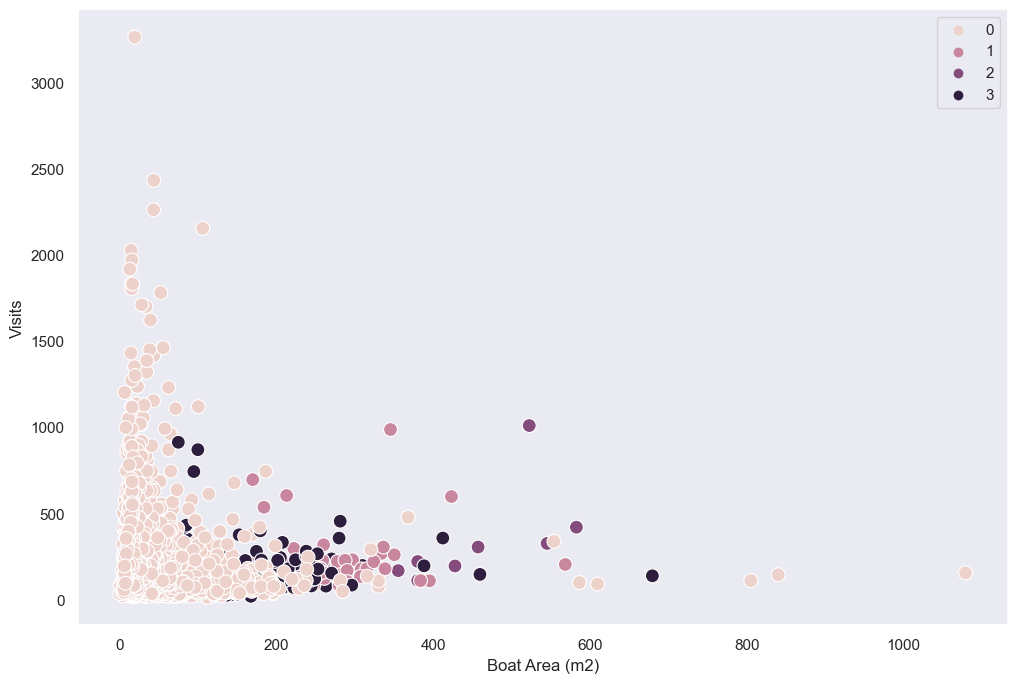

In [20]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Boat Area (m2)'], y=df1['Visits'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Boat Area (m2)') # Label x-axis.
plt.ylabel('Visits') # Label y-axis.
plt.show()

#### Analyzing the plots, one can see that the the clusters do make sense because we get enhanced information, that we did wer not able to grasp on the initial scatterplots. It appears the algorithm used was able to identify/apply a padron where some kind relationship beetween these variables exists.
#### It's easier this way to segmentate and understand  the information in this way.
#### It´s worth exploring because more insights will be obtained.


In [21]:
# Describing  descritpive statistics results
df.loc[df1['clusters'] == 3, 'Cluster'] = 'red'
df.loc[df1['clusters'] == 2, 'cluster'] = 'light purple'
df.loc[df1['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df1['clusters'] == 0, 'cluster'] = 'light pink'

C:\Users\Mafalda\AppData\Local\Temp\ipykernel_15420\3300420274.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'red' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df1['clusters'] == 3, 'Cluster'] = 'red'
C:\Users\Mafalda\AppData\Local\Temp\ipykernel_15420\3300420274.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'light purple' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df1['clusters'] == 2, 'cluster'] = 'light purple'


In [22]:
df.groupby('cluster').agg({'Price':['mean', 'median'], 
                         'Boat Age':['mean', 'median'], 
                         'Length':['mean', 'median'],
                         'Width':['mean', 'median'],
                         'Boat Area (m2)':['mean', 'median'],
                          'Visits':['mean', 'median']})

Price               Boat Age            Length         \
                      mean      median       mean median       mean median   
cluster                                                                      
light pink    1.587038e+05     85000.0  25.897567   16.0  10.825583   9.98   
light purple  1.946750e+07  16825000.0  32.861447    8.0  45.810000  44.85   
pink          7.080397e+06   6593129.0  15.721535    7.0  33.298310  31.70   

                 Width        Boat Area (m2)              Visits         
                  mean median           mean  median        mean median  
cluster                                                                  
light pink    3.374215   3.23      40.894839   32.44  150.654619  109.0  
light purple  9.130000   9.50     422.991000  403.75  296.400000  207.0  
pink          7.265211   7.26     246.452254  230.33  182.394366  132.0

#### 

#### From this table we can see that the last , third, red cluester is not relevant. From all the other three we can see that the light purple cluster is the most stable one with the more aproximated values of mean and median. Follow by the light pink one, and the incosistent cluster is the pink one.

### 4. Combining PCA and K-means Clustering
#### Since the variable Price has a much bigger scale than the other variables, i will analyze the data once more with method to see if there are any changes

In [28]:
path = r"C:\Users\Mafalda\Documents\mafalda\Formação\Data Analytics\CareerFoundry\Data Analytics Program\2.Data Immersion\Achievement 6\Boat Sales Analysis"

In [29]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_data_categories_v1.csv'), index_col = False)

In [30]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_data_categories_v1.csv'), index_col = False)
df1=df.drop(['Unnamed: 0','Boat Type', 'Manufacturer','Condition','Year Built','Material','Country', 'Visits_categorical' ],axis = 1)

In [31]:
df1

,Price,Boat Age,Length,Width,Boat Area (m2),Visits
0,3537,6.000000,4.00,1.90,7.60,226
1,3490,3.000000,4.00,1.50,6.00,75
2,3996,129.807237,3.69,1.42,5.24,124
3,3367,3.000000,3.00,1.00,3.00,64
4,3399,4.000000,3.55,1.46,5.18,58
...,...,...,...,...,...,...
9888,5194,36.000000,6.30,2.44,15.37,1116
9889,4516,129.807237,4.17,1.68,7.01,94
9890,4499,3.000000,4.40,1.80,7.92,354
9891,4300,5.000000,4.37,1.89,8.26,266


In [35]:
# Standardazing data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
segmentation_std=scaler.fit_transform(df1)

In [39]:
# Dimensionality reduction with PCA
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(segmentation_std)

PCA()

In [40]:
# The attribute shows how much variance is explained by each of the seven components
pca.explained_variance_ratio_


array([0.54357233, 0.17190458, 0.16321909, 0.09084021, 0.02307642,
       0.00738737])

Text(0, 0.5, 'Cumulative Explained Variance')

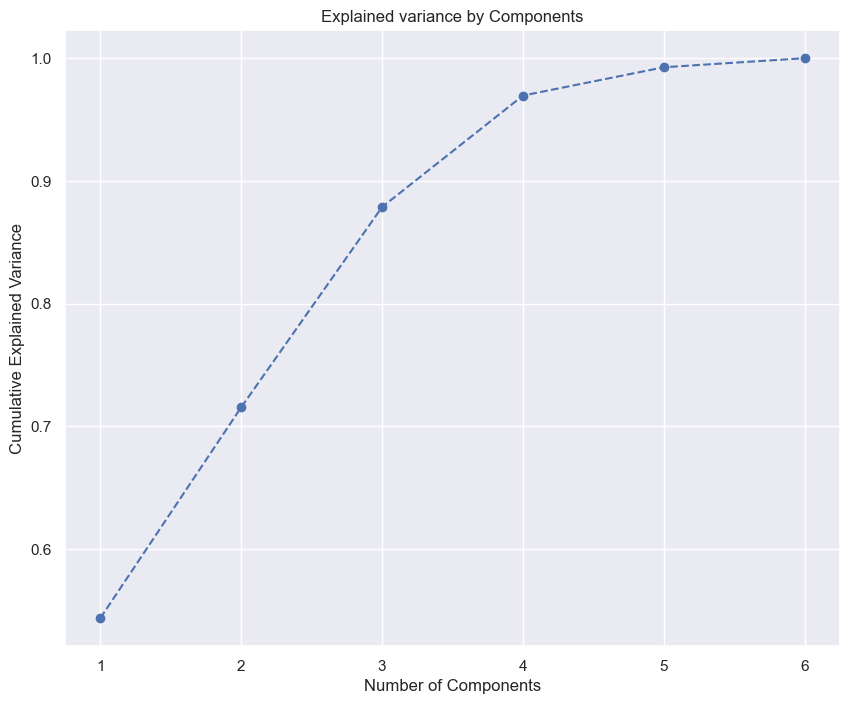

In [41]:
# Plot result
plt.figure( figsize=(10,8))
plt.plot(range(1,7),pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle='--' )
plt.title('Explained variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

##### It is of best pratice to preserve around 80% of the variance, so i wil keep 3 principal components for the data set.

In [42]:
# Performing PCA with 3 principal components
pca= PCA(n_components=3)

In [43]:
#Fitting the model with selected number of components
pca.fit(segmentation_std)


PCA(n_components=3)

In [44]:
pca.transform(segmentation_std)

array([[-1.96502735, -0.22255138,  0.75672502],
       [-2.05762777, -0.91048439,  0.08488788],
       [-2.19917483,  2.28007578, -2.10700744],
       ...,
       [-2.04550672,  0.24596829,  1.4378447 ],
       [-1.95303691, -0.07540191,  0.9686422 ],
       [-2.12689708, -0.39907938,  0.64763169]])

In [45]:
scores_pca=pca.transform( segmentation_std)

#### K-means clustering with PCA

In [46]:
# Fitting k means using the trnasformed data feom PCA
wcss = []
for i in range(1,21):
   kmeans_pca =  KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
   kmeans_pca.fit(scores_pca)
   wcss.append(kmeans_pca.inertia_)

C:\Users\Mafalda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mafalda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mafalda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mafalda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

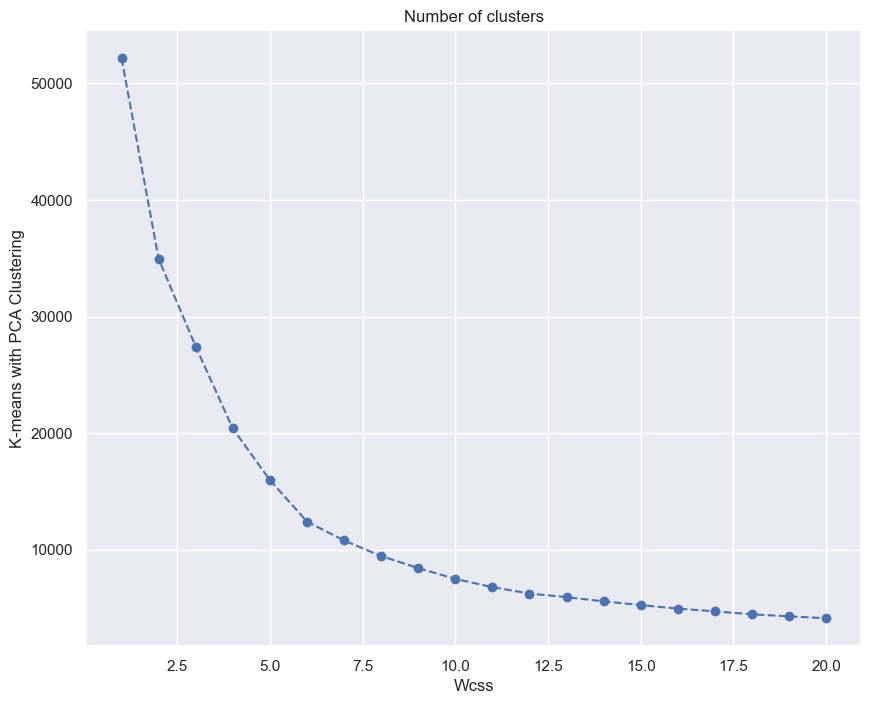

In [47]:
# Plotting wcss against the number of components
plt.figure( figsize=(10,8))
plt.plot(range(1,21),wcss, marker = 'o', linestyle='--' )
plt.title('Number of clusters')
plt.xlabel('Wcss')
plt.ylabel('K-means with PCA Clustering')
plt.show()

#### Using the elbow technique, the optimal count for your clusters is six.

In [48]:
#Implementing the process with 6 clusters
kmeans_pca =  KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)

In [49]:
#Fitting data with the K-means pca model
kmeans_pca.fit(scores_pca)

C:\Users\Mafalda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=42)

#### K-means clustering with PCA Results

In [50]:
#Creating new data from orignal features and the PCA scores and asssign clusters
df_segm_pca_kmeans = pd.concat([df1.reset_index( drop = True),pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-3:]=['Component 1','Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA']=kmeans_pca.labels_ # Adding labels

In [51]:
df_segm_pca_kmeans.head()

,Price,Boat Age,Length,Width,Boat Area (m2),Visits,Component 1,Component 2,Component 3,Segment K-means PCA
0,3537,6.000000,4.00,1.90,7.60,226,-1.965027,-0.222551,0.756725,5
1,3490,3.000000,4.00,1.50,6.00,75,-2.057628,-0.910484,0.084888,5
2,3996,129.807237,3.69,1.42,5.24,124,-2.199175,2.280076,-2.107007,2
3,3367,3.000000,3.00,1.00,3.00,64,-2.383520,-0.952927,0.047978,5
4,3399,4.000000,3.55,1.46,5.18,58,-2.113383,-0.961277,-0.013112,5


In [52]:
# Creating a new column named segment an d custer maps
df_segm_pca_kmeans['Segment']=df_segm_pca_kmeans['Segment K-means PCA'].map ({0:'first', 1:'second', 2:'third', 3:'fourth',4:'fifth', 5:'sixth'})

C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

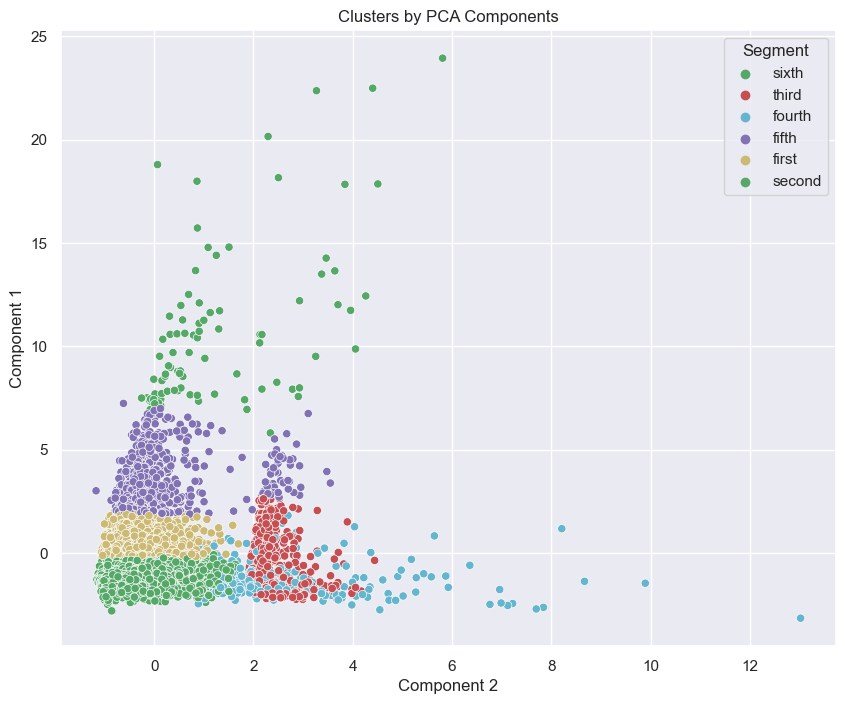

In [53]:
# Plotting data by PCA components . The  axis is the first component,X axis is the second.
x_axis=df_segm_pca_kmeans['Component 2']
y_axis=df_segm_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x= x_axis, y=y_axis, hue=df_segm_pca_kmeans['Segment'], palette=['g','r','c','m', 'y'])
plt.title('Clusters by PCA Components')
plt.show()

#### From the chart analysis we can see that there are still defined clusters  beetween the first 2 components meaning that this data association could imply some kind of relatioship to be explored further.
